In [150]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=28934098)

df=pd.read_csv("SOCR-HeightWeight.csv")
df["Altura"] = round(df["Height(Inches)"]*2.54, 1)
df["Peso"]= df["Weight(Pounds)"]*0.453592

#df=pd.read_excel("HeightWeight_minitab.xlsx")
#df["Altura"] = df["Height"]*2.54
#df["Peso"]= df["Weight"]*0.453592

#df=pd.read_csv("weight-height.csv")
#df["Altura"] = round(df["Height"]*2.54,1)
#df["Peso"]= df["Weight"]*0.453592


<Axes: xlabel='Peso', ylabel='Altura'>

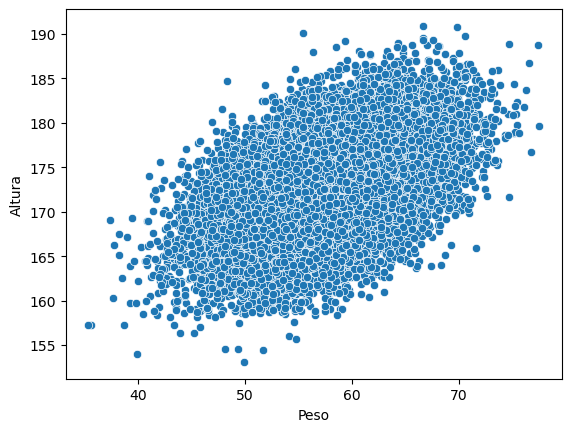

In [151]:
sns.scatterplot(data=df, x="Peso", y="Altura")

<Axes: xlabel='peso_medio', ylabel='altura'>

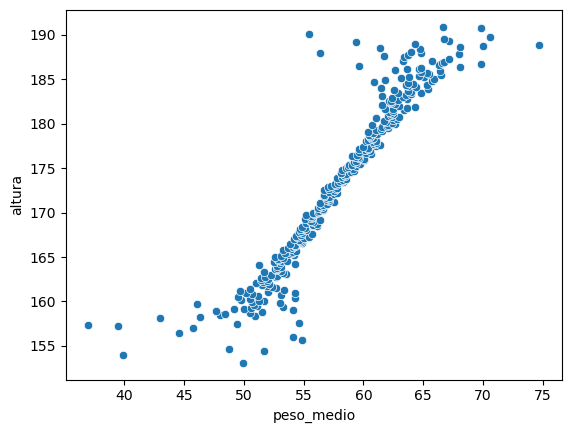

In [152]:
# Calculando a média de altura para cada peso
df_PM = df.groupby('Altura')['Peso'].mean().reset_index()

# Renomeando as colunas
df_PM.columns = ['altura','peso_medio']
sns.scatterplot(data=df_PM, x="peso_medio", y="altura")

(58, 3)


<Axes: xlabel='peso_medio', ylabel='altura'>

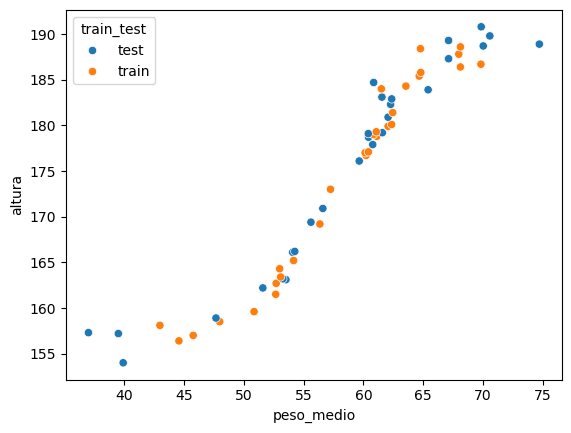

In [153]:
df_PM["fica"] = np.random.choice(["fica","sai"], size=df_PM.shape[0],p=[0.1,0.9])

df_PM.loc[df_PM["peso_medio"] > 67 ,"fica"] = "fica"
df_PM.loc[df_PM["peso_medio"] < 46 ,"fica"] = "fica"
df_PM = df_PM[df_PM["fica"] == "fica"]
df_PM = df_PM[df_PM["altura"] > 150]

print(df_PM.shape)
df_PM["train_test"] = np.random.choice(["train","test"], size=df_PM.shape[0],p=[0.5,0.5])
sns.scatterplot(data=df_PM, x="peso_medio", y="altura", hue="train_test")

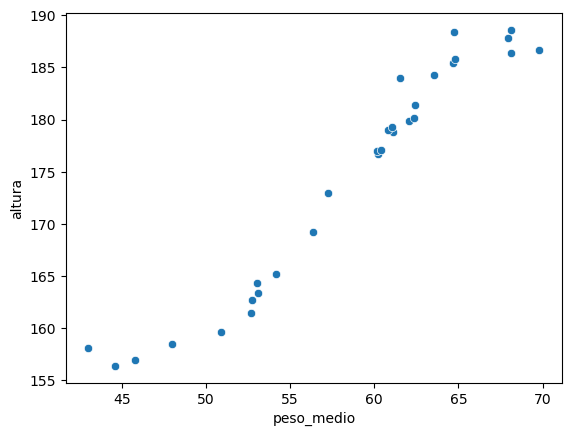

In [154]:
df_train = df_PM[df_PM["train_test"] == "train"]
sns.scatterplot(data=df_train, x="peso_medio", y="altura")
df_test = df_PM[df_PM["train_test"] == "test"]

/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_1909/4027090761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'Yhat'] = Yhat


<Axes: xlabel='peso_medio', ylabel='altura'>

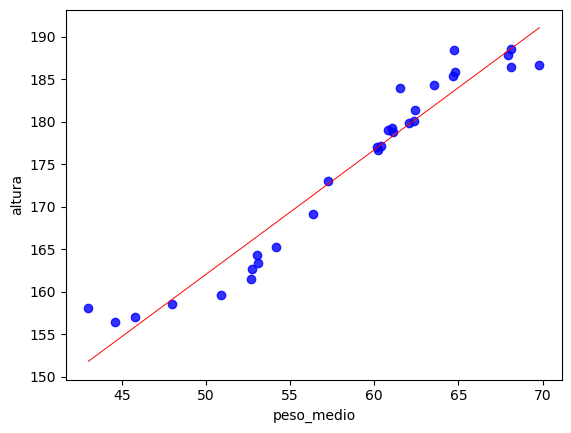

In [162]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# variável independente
X = df_train[['peso_medio']] 

# variável dependente
Y = df_train[['altura']] 

# Criando a regressão
lm.fit(X,Y)

# Valores da predição
Yhat = lm.predict(X)

# Criando uma nova coluna Yhat
df_train.loc[:,'Yhat'] = Yhat

sns.regplot(data=df_train, x="peso_medio", y="altura", order=1, ci=0,
            marker="o", color="blue", line_kws=dict(color="r", linewidth = 0.7))


/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_1909/3641397383.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'Yhat'] = Yhat


<Axes: xlabel='peso_medio', ylabel='altura'>

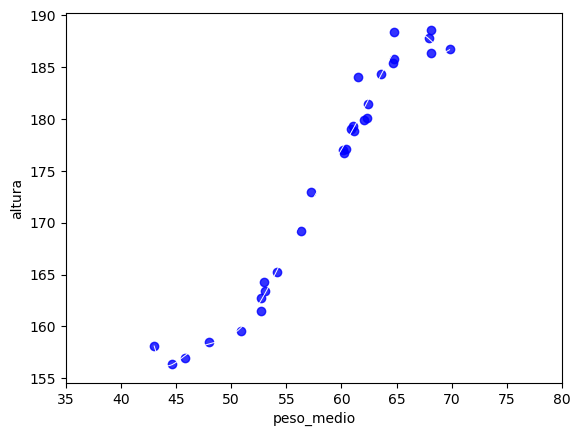

In [166]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# variável independente
X = df_train[['peso_medio']] 

# variável dependente
Y = df_train[['altura']] 

# Criando a regressão
lm.fit(X,Y)

# Valores da predição
Yhat = lm.predict(X)

# Criando uma nova coluna Yhat
df_train.loc[:,'Yhat'] = Yhat
plt.xlim(35, 80) 
sns.regplot(data=df_train, x="peso_medio", y="altura", order=8, ci=0,
            marker="o", color="blue", line_kws=dict(color="white", linewidth = 0.7))

<Axes: xlabel='peso_medio', ylabel='altura'>

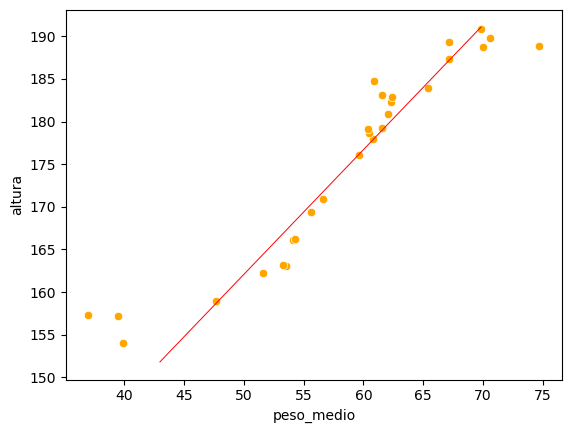

In [163]:
sns.regplot(data=df_train, x="peso_medio", y="altura", order=1, ci=0,
            marker="", color="black", line_kws=dict(color="r", linewidth = 0.7))
sns.scatterplot(data=df_test, x="peso_medio", y="altura",marker="o", color="orange")

<Axes: xlabel='peso_medio', ylabel='altura'>

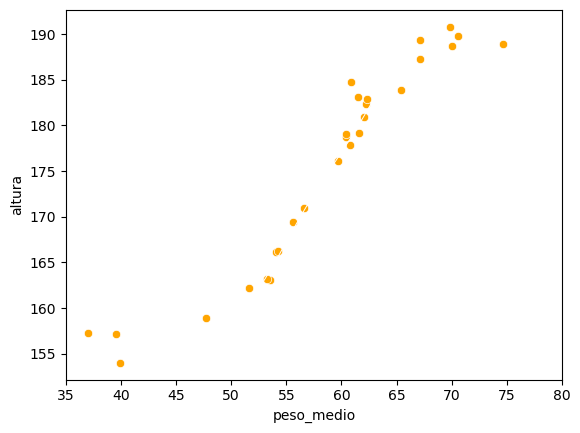

In [167]:
plt.xlim(35, 80) 
sns.regplot(data=df_train, x="peso_medio", y="altura", order=8, ci=0,
            marker="", color="black", line_kws=dict(color="w", linewidth = 0.7))
sns.scatterplot(data=df_test, x="peso_medio", y="altura", color = "orange")

In [ ]:
sns.regplot(data=df_train, x="peso_medio", y="altura", order=1, ci=0,
            marker="o", color="blue", line_kws=dict(color="r", linewidth = 0.7))